> **提示**：欢迎参加“调查数据集”项目！引用段会添加这类提示，来帮助你制定调查方法。在你提交项目之前，你可以浏览一下报告，将这一段删除，以保持报告的简洁性。首先，你需要双击该 Markdown 框(cell)，将标题更改为与数据集和调查相关的标题。

# 项目：调查数据集（请用更具体的标题来代替这个标题！）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在报告的这一部分，你需要首先对已选择进行分析的数据集进行简要的介绍。在这一部分末尾，对你计划在报告过程中探索的问题进行描述。你需要建立至少包含一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，请务必先熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

In [1]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

**背景信息简介**  
本数据集中包含 1 万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包括用户评分和票房。“演职人员 (cast)”、“电影类别 (genres)”等数据列包含由竖线字符（|）分隔的多个数值。“演职人员 (cast) ”列中有一些奇怪的字符。先不要清洁它们，你可以保持原样，不去管它们。以“_adj”结尾的最后两列表示了考虑了通货膨胀之后的相关电影的预算和收入（以2010年美元的价值来计算）。

In [2]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime
import warnings
# 务必包含一个‘magic word’（带有“%”的***），以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [3]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv("./tmdb-movies.csv")
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
# data fields information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# data dimention information
df.shape

(10866, 21)

In [6]:
# explore the missing value
df.isnull().sum() / df.shape[0] * 100

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

<font color="blue">**分析问题：**
    
从以上的电影数据信息中，可以初步看到以下相关信息：  
1. 数据包括 21 个字段，以及 10,866 个数据点
2. 数据包括了电影的流行程度信息（`populatity`），演员信息（`cast`），电影类型（`genres`），投票信息等字段数据
3. **分析电影流行程度因素**，分析的角度主要包括： 
    * 电影类型是否具有更突出电影流行度
    * 电影导演与流行度相关性
    * 哪位导演的哪种类型的电影更有可能流行
    * 电影的预算、收益等与流行度相关性
    * 年份和电影流行性的相关行，及电影随着年份的演变
</font>

### 数据评估

In [7]:
# analysis the duplicate data
df.duplicated().sum()

1

In [8]:
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**数据评估：**

1. 数据类型错误  
    * id 用于表示每个数据的定序数据
    * release_year 是发行年份，可以使用定序数据
    * release_date 是发行日期，应该使用 datetime 类型
2. 数据内容不合适  
    * cast 的演员使用了 | 进行分隔演员名称
    * genres 的电影类型同样使用 | 分隔电影类型
3. 数据缺失  
    * homepage 数据内容确实严重
    * tagline 数据存在缺失值
    * keywords 数据存在缺失值
    * production_companies 数据存在缺失值
4. 数据冗余  
    * 存在重复数据

> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

### 数据清理（请用更具体的标题来代替该标题。）

#### 数据类型错误修改
* id 修改数据为定序数据
* release_year 是发行年份，可以使用定序数据
* release_date 是发行日期，应该使用 datetime 类型

In [10]:
# 在讨论数据结构和需要解决的任何问题之后，
#   在本部分的第二小部分进行这些清理步骤。
# change the id datatype
df[["id", "release_year"]] = df[["id", "release_year"]].astype("category")

# change the release_date datatype
df["release_date"] = pd.to_datetime(df.release_date)

In [11]:
# check the year 
(df.release_date.dt.year != df.release_year).sum()

292

In [12]:
# change the date
change_date = pd.Series(index=df.index)
for row in df.loc[:, ["release_date", "release_year"]].iterrows():
    if datetime.date.isocalendar(row[1][0])[0] == row[1][1]:
        change_date.loc[row[0]] = row[1][0]
    else:
        change_date.loc[row[0]] = datetime.date(
            row[1][1], int(datetime.date.isoformat(row[1][0])[5:7]), 
            int(datetime.date.isoformat(row[1][0])[-2:]))

df["release_date"] = pd.to_datetime(change_date)

#### 数据内容不合适  
* cast 的演员使用了 | 进行分隔演员名称，将相关数据拆分
* genres 的电影类型同样使用 | 分隔电影类型，将相关数据拆分

In [13]:
genres_type = set()
for i in df.genres:
    if pd.notnull(i):
        genres_type.update(set(i.split("|")))

        
for genre in genres_type:
    df[genre] = df.genres.apply(lambda x: x if pd.isnull(x) else (1 if genre in x else 0))

#### 其他数据问题处理
1. 数据缺失  
    * homepage 数据内容确实严重
    * tagline 数据存在缺失值
    * keywords 数据存在缺失值
    * production_companies 数据存在缺失值
4. 数据冗余  
    * 存在重复数据，删除冗余值

In [14]:
df.drop(["homepage", "tagline", "keywords", "production_companies"], inplace=True, axis=1)

In [15]:
# drop the duplicated data
df.drop_duplicates(inplace=True)

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1（电影类型是否具有更突出电影流行度）

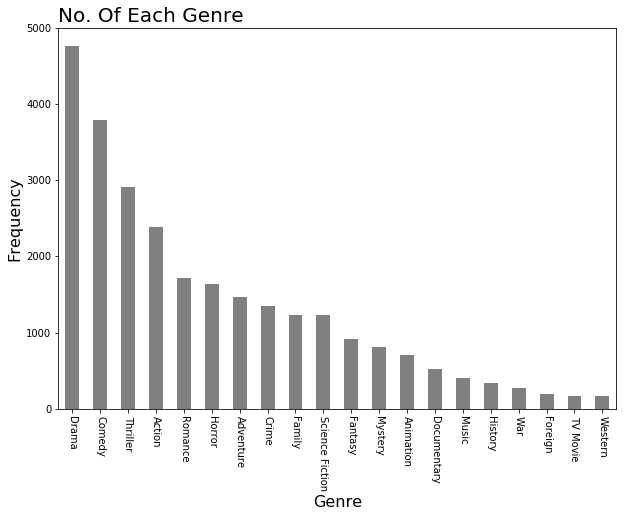

In [16]:
plt.figure(figsize=(10, 7))
df.loc[:, genres_type].sum().sort_values(ascending=False).plot(kind="bar", rot=270, color="grey")
plt.title("No. Of Each Genre", fontsize=20, loc="left")
plt.xlabel("Genre", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

In [17]:
df.popularity.describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

In [18]:
df["popularity_type"] = pd.cut(df.popularity, [0, 0.2, 0.7, 1, 100], 
                               labels=["Low", "Middle", "Middle High", "High"])

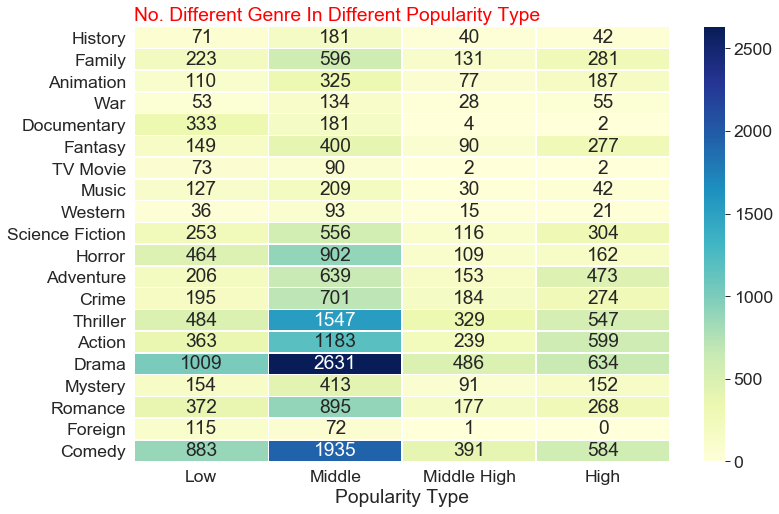

In [19]:
with sns.axes_style("dark"), sns.plotting_context("paper", font_scale=2):
    plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sns.heatmap(df.groupby("popularity_type")[list(genres_type)].sum().T.astype("int"),
               annot=True, fmt="d", ax=ax, linewidth=.5, cmap="YlGnBu")
    plt.title("No. Different Genre In Different Popularity Type", loc="left", color="r")
    plt.xlabel("Popularity Type")
    plt.show()

**电影类型和电影流行度关系**：  

1. 从电影类型统计来看，所有电影类型中 Drama 的数量是最多的，紧接着是 Comedy 和 Thriller
2. 将电影流行度进行分类，按照小于 0.2 的为低流行度，0.2 至 0.7 划分为中等流行度，0.7 到 1 划分为中高等流行度以及超过 1 的划分为高等流行度
3. 对各种类型和流行度进行统计分析可以看出：
    * Drama 在整体上各类型的数量是最高的，而且普遍在中等流行度
    * 在高流行度中，动作片更易受到欢迎
    * 其他方面 Documentary，Romance 的数量在低流行度中也不少
    * Adventure 和 Science Fiction， Crime，Romance 在中等流行度上可以看作是第二等数量

### 研究问题 2（电影导演与流行度相关性）

In [20]:
df.director.isnull().sum()

44

In [21]:
df["director_fix"] = df["director"]
df.loc[df.director.notnull(), "director_fix"] = df.loc[df.director.notnull(), "director_fix"].str.split("|").apply(lambda x: x[0].strip())

In [22]:
director_sum_popularity = df.groupby("director_fix").popularity.sum().nlargest(10)
director_mean_popularity = df.groupby("director_fix").popularity.mean().nlargest(10)

In [23]:
# set the pct text
def func(pct, data):
    value = round(pct* np.sum(data) / 100, 2)
    return "{:.1f}%\n{:.1f}".format(pct, value)

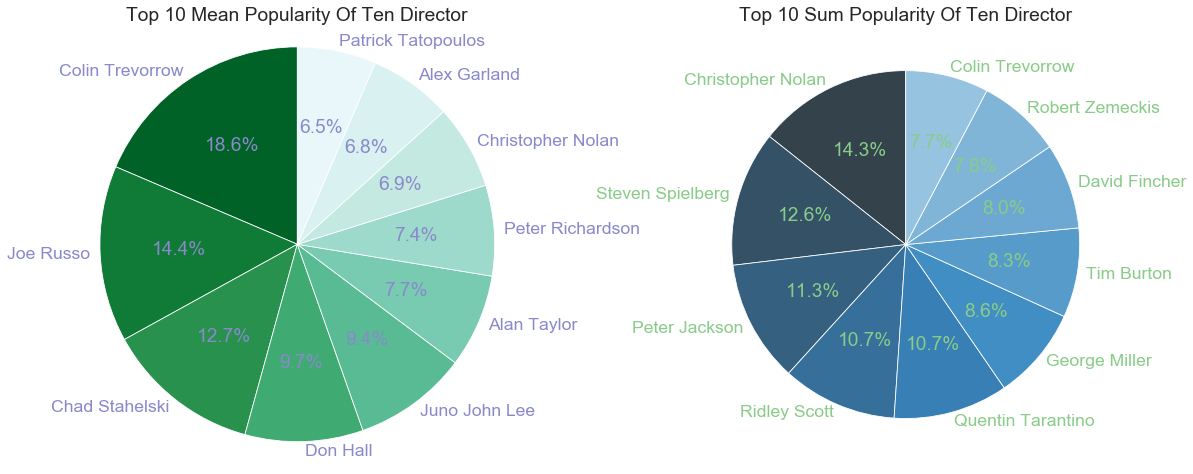

In [24]:
with sns.axes_style("dark"), sns.plotting_context("paper", font_scale=2):
    
    fig, ax = plt.subplots(figsize=(20, 8), ncols=2)
    ax[0].pie(director_mean_popularity, labels=director_mean_popularity.index, 
           startangle=90, autopct="%1.1f%%", labeldistance=1.05, textprops={"color":"#8989CC"},
              colors=sns.color_palette("BuGn_r", n_colors=10))
    ax[0].axis("equal")
    ax[0].set_title("Top 10 Mean Popularity Of Ten Director")

    
    ax[1].pie(director_sum_popularity, labels=director_sum_popularity.index,
             startangle=90, autopct="%1.1f%%", labeldistance=1.05,textprops={"color":"#89CC89"},
             colors=sns.color_palette("Blues_d", n_colors=10))
    ax[1].set_title("Top 10 Sum Popularity Of Ten Director")
    plt.show()

In [25]:
director_mean_popularity.index.intersection(director_sum_popularity.index).tolist()

['Colin Trevorrow', 'Christopher Nolan']

In [26]:
df.loc[df.director_fix.isin(director_mean_popularity.index.union(director_sum_popularity.index))].groupby("director_fix").size().sort_values(ascending=False)

director_fix
Steven Spielberg      29
Ridley Scott          23
Tim Burton            20
Robert Zemeckis       17
Peter Jackson         13
Quentin Tarantino     11
Christopher Nolan     10
David Fincher         10
George Miller          9
Colin Trevorrow        2
Alan Taylor            2
Don Hall               1
Juno John Lee          1
Patrick Tatopoulos     1
Peter Richardson       1
Chad Stahelski         1
Alex Garland           1
Joe Russo              1
dtype: int64

In [27]:
df.director_fix.value_counts().index[df.director_fix.value_counts() > 5]

Index(['Woody Allen', 'Clint Eastwood', 'Martin Scorsese', 'Steven Spielberg',
       'Ridley Scott', 'Ron Howard', 'Steven Soderbergh', 'Joel Schumacher',
       'Tim Burton', 'Brian De Palma',
       ...
       'Jon M. Chu', 'Jay Oliva', 'Tim Hill', 'Nicolas Roeg',
       'David Mackenzie', 'George Tillman, Jr.', 'John Milius', 'Jeff Kanew',
       'Wim Wenders', 'Louis C.K.'],
      dtype='object', length=390)

In [28]:
df.loc[df.director_fix.isin(['Colin Trevorrow']), list(genres_type)].sum().nlargest(10)

Science Fiction    2.0
Adventure          1.0
Thriller           1.0
Action             1.0
Drama              1.0
Romance            1.0
Comedy             1.0
History            0.0
Family             0.0
Animation          0.0
dtype: float64

In [29]:
with warnings.catch_warnings(),sns.axes_style("dark"), sns.plotting_context("paper", font_scale=2):
    warnings.simplefilter("ignore")
    director = df.director_fix.value_counts().sort_index().reset_index()
    director.columns = ["director", "total"]
    director = director.merge(df.groupby("director_fix").popularity.agg({
        "mean_pop": np.mean, "sum_pop": np.sum
    }).reset_index(), how="left", left_on="director", right_on="director_fix")
    director.drop("director_fix", axis=1, inplace=True)
    
    director = director.merge(
        df.groupby("director_fix")[list(genres_type)].sum(). \
            applymap(lambda x: x >=1).sum(axis=1).reset_index(name="count_type"),
        how="left", left_on="director", right_on="director_fix")
    director.drop("director_fix", axis=1, inplace=True)

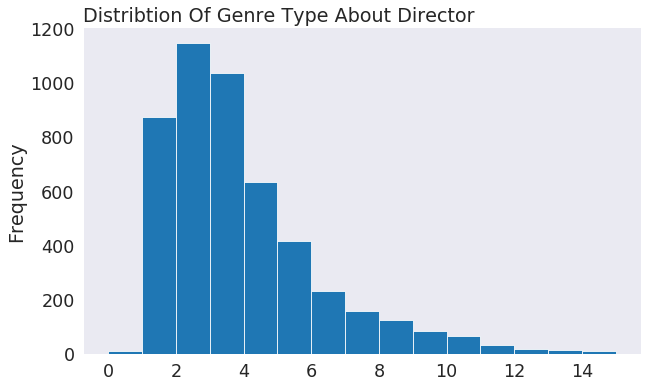

In [30]:
with sns.axes_style("dark"), sns.plotting_context("paper", font_scale=2):
    plt.figure(figsize=(10, 6))
    director.count_type.plot("hist", bins=15)
    plt.title("Distribtion Of Genre Type About Director", loc="left")

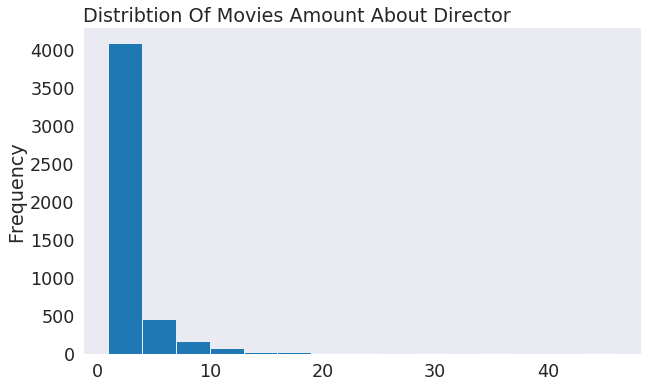

In [31]:
with sns.axes_style("dark"), sns.plotting_context("paper", font_scale=2):
    plt.figure(figsize=(10, 6))
    director.total.plot("hist", bins=15)
    plt.title("Distribtion Of Movies Amount About Director", loc="left")

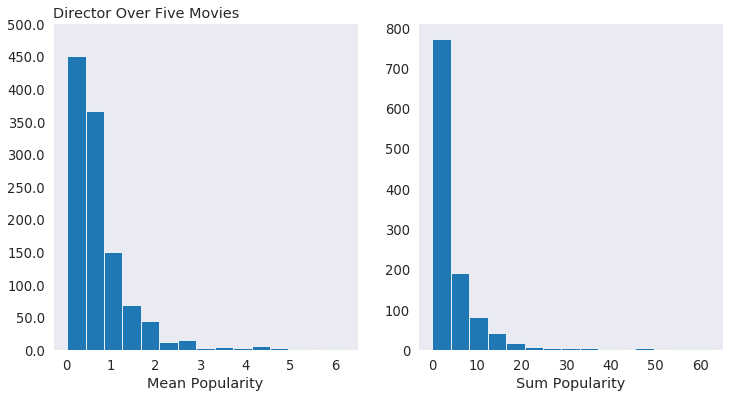

In [32]:
with sns.axes_style("dark"), sns.plotting_context("paper", font_scale=1.5):
    _, ax = plt.subplots(figsize=(12, 6), ncols=2)
    director.loc[director.total > 2, "mean_pop"].plot("hist", bins=15, ax=ax[0])
    ax[0].set_title("Director Over Five Movies", loc="left")
    ax[0].set_xlabel("Mean Popularity")
#     ax[0].set_yticks(np)
    ax[0].set_yticks(ticks=np.arange(0, ax[0].get_yticks().max()+50, 50))
    ax[0].set_yticklabels(labels=np.arange(0, ax[0].get_yticks().max()+50, 50))
    ax[0].set_ylabel("")
    
    director.loc[director.total > 2, "sum_pop"].plot("hist", bins=15, ax=ax[1])
#     ax[1].set_title("Director Over Five Movies", loc="left")
    ax[1].set_xlabel("Sum Popularity")
    ax[1].set_ylabel("")

In [33]:
director.sort_values(["total", "sum_pop", "mean_pop", "count_type"], ascending=False).head(20)

,director,total,mean_pop,sum_pop,count_type
4770,Woody Allen,46,0.559087,25.718009,10
845,Clint Eastwood,34,0.830037,28.221269,14
3037,Martin Scorsese,30,1.097426,32.922769,11
4397,Steven Spielberg,29,1.875138,54.378995,15
3863,Ridley Scott,23,2.009294,46.213770,13
4005,Ron Howard,22,1.295499,28.500979,13
4396,Steven Soderbergh,22,0.945138,20.793033,10
2255,Joel Schumacher,21,0.768102,16.130141,13
4506,Tim Burton,20,1.795681,35.913626,15
553,Brian De Palma,20,0.861027,17.220538,14


**电影导演与流行度：**

在进行分析电影导演时，仅使用了排位第一位的导演进行分析。分析了各导演在 popularity 方面的平均得分和总分数：
* 从平均得分来看，Colin Trevorrow 的电影流行度是最高的，而且他的电影数量是仅有两部，两部的流行程度都是偏高的。从电影类型来看，他更擅长 Science Fiction
* 紧接着是 Joe Russo 和 Chad Stahelski。但是统计他们的电影数量发现，他们仅拍摄了一部定影——算是一战成名
* 在电影 popularity 总分分析方面，Christopher Nolan，Steven Spielberg 以及 Peter Jackson 的排名最高

以上的导演的总体来看，Christopher Nolan 是数量和质量的保障。

此外分析了所有导演的电影数量， popularity，电影类型数量方面：
* 最高产的导演是 Woody Allen，虽然平均得分不是很高，但是拍摄类型以及电影数量方面都是又不错表现
* 超过五部电影的导演，很少能在平均 popularity 超过 2，大部分集中在 1 以内
* 超过五部电影的导演，很少能在合计 popularity 超过 20，大部分集中在 5 以内

### 研究问题 3（执导了超过五部电影导演的哪种类型的电影更有可能流行）

In [34]:
director = director.merge(df.groupby("director_fix")[list(genres_type)].sum().reset_index(),
        how="left", left_on="director", right_on="director_fix")
director.drop("director_fix", axis=1, inplace=True)

In [35]:
director.head()

,director,total,mean_pop,sum_pop,count_type,History,Family,Animation,War,Documentary,...,Horror,Adventure,Crime,Thriller,Action,Drama,Mystery,Romance,Foreign,Comedy
0,A. Todd Smith,1,1.876037,1.876037,3,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,A.R. Murugadoss,1,0.215030,0.215030,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,Aaron Aites,1,0.108700,0.108700,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aaron Blaise,1,1.653031,1.653031,4,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Hann,1,0.350599,0.350599,4,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


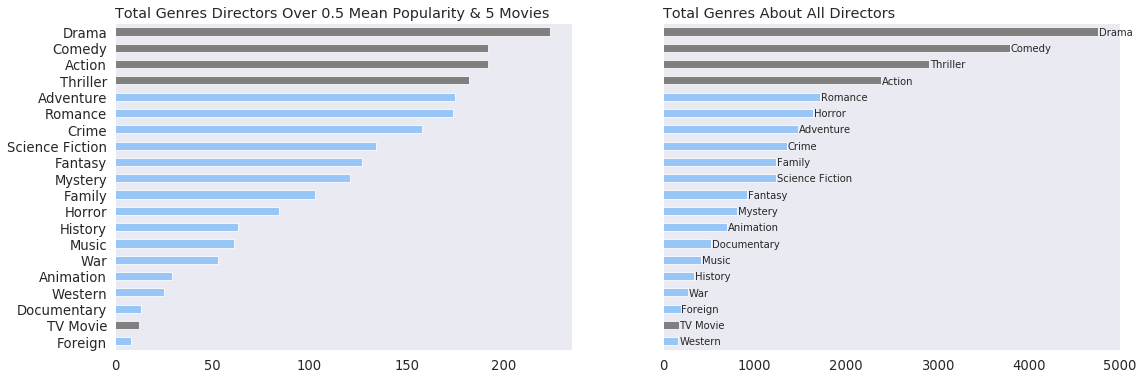

In [36]:
colors = []
for index1, index2 in zip(director.query("total > 2 & mean_pop > 0.5")[
        list(genres_type)].applymap(lambda x: x > 0).sum().sort_values().index,
                         df.loc[:, genres_type].sum().sort_values().index):
    if index1 == index2:
        colors.append("grey")
    else:
        colors.append("#98c6f7")

with sns.axes_style("dark"), sns.plotting_context("paper", font_scale=1.5):
    _, ax = plt.subplots(figsize=(18, 6), ncols=2)
    director.query("total > 5 & mean_pop > 0.5")[
        list(genres_type)].applymap(lambda x: x > 0).sum().sort_values().plot(
            kind="barh", color=colors, ax=ax[0])
    ax[0].set_title("Total Genres Directors Over 0.5 Mean Popularity & 5 Movies", loc="left")
    
    all_genres = df.loc[:, genres_type].sum().sort_values()
    all_genres.plot(kind="barh", color=colors, ax=ax[1])
    ax[1].set_title("Total Genres About All Directors", loc="left")
    
    for yx, label in zip(enumerate(all_genres.values), all_genres.index):
        y, x = yx
        ax[1].text(x+10, y-0.2, label, fontsize=10)
    ax[1].tick_params(axis="y", labelleft=False)

In [37]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    data = df[list(genres_type)].copy()

    for i in data.columns:
        data[i] = data[i] * df["popularity"]

    data["director"] = df.director_fix

    columns = data.groupby("director")[list(genres_type)].agg({"mean":np.mean}).columns.get_level_values(0) + \
                data.groupby("director")[list(genres_type)].agg({"mean":np.mean}).columns.get_level_values(1)
    test1 = data.groupby("director")[list(genres_type)].agg({"mean":np.mean})
    test1.columns = columns
    director = director.merge(test1.reset_index(), on="director")


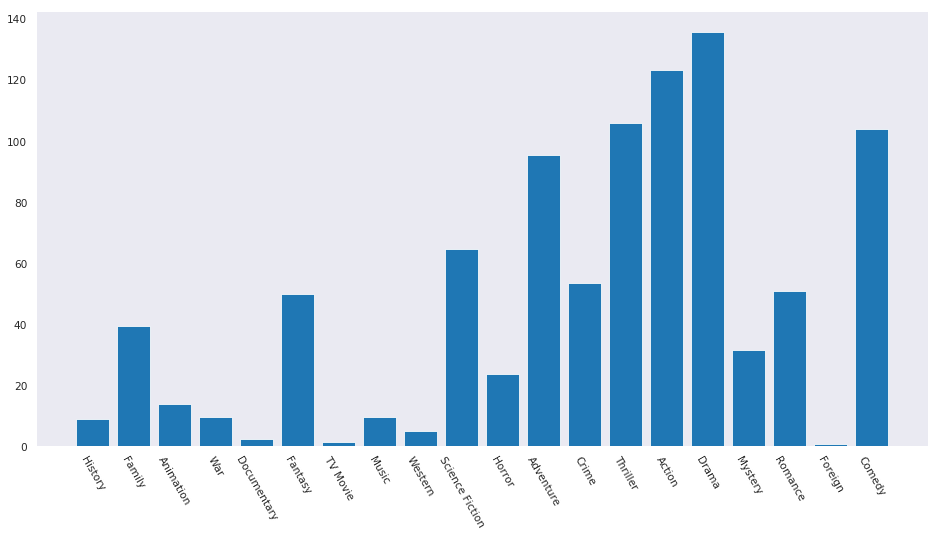

In [38]:
with sns.axes_style("dark"), sns.plotting_context("paper", font_scale=1.2):
    
    fig, ax = plt.subplots(figsize=(16, 8), ncols=1)
    ax.bar(x=np.arange(0, 20), height=director.query("total > 5").loc[:, columns].sum())
    ax.set_xticks(np.arange(0, 20))
    ax.set_xticklabels(labels=[x[4:] for x in columns])
    ax.tick_params(axis="x", labelrotation=300)

### 研究问题 4（年份和电影流行性的相关行，及电影随着年份的演变）

In [39]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    release_data = df.groupby("release_year")["popularity"].agg({
        "total_popularity":sum, "mean_popularity":np.mean, "total":len
    }).reset_index()

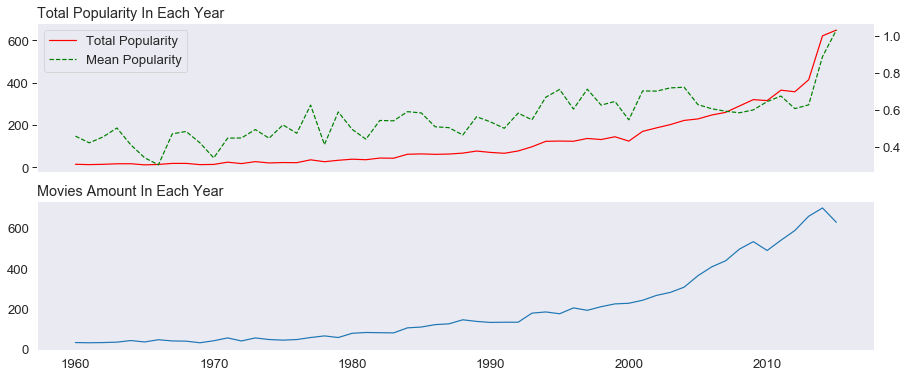

In [40]:
with sns.axes_style("dark"), sns.plotting_context("paper", font_scale=1.5):
    handles = []
    labels = []
    
    _, ax = plt.subplots(figsize=(15, 6), nrows=2)
    sns.lineplot(x="release_year", y="total", data=release_data, ax=ax[1])
    ax[1].set_title("Movies Amount In Each Year", loc="left")
    ax[1].set_xlabel("")
    ax[1].set_ylabel("")
    
    release_data.plot(kind="line", x="release_year", y="total_popularity", 
                      ax=ax[0], legend=False, color="r")
    ax[0].set_title("Total Popularity In Each Year", loc="left")
    ax[0].set_xlabel("")
    ax[0].set_ylabel("")
    ax[0].legend([])
    
    ax1 = ax[0].twinx()
    
    release_data.plot(kind="line", x="release_year", y="mean_popularity", 
                      ax=ax1, color="g", linestyle="dashed", legend=False)
    
    line1 = mpl.lines.Line2D([], [], color="r", label="Total Popularity")
    line2 = mpl.lines.Line2D([], [], color="g", label="Mean Popularity", 
                             linestyle="dashed")
    ax[0].legend(handles=[line1, line2])
    
    plt.show()

In [41]:
release_data.corr()

,total_popularity,mean_popularity,total
total_popularity,1.000000,0.799937,0.966161
mean_popularity,0.799937,1.000000,0.711981
total,0.966161,0.711981,1.000000


从每年的分布情况来看：

1. 随着时间前进，每年的电影总数量是在增加
2. 电影的受欢迎的程度在增加，在进入上世纪末之后电影的产量和受欢迎程度也在快速增高
2. 在本世纪初以前，受欢迎程度还是参差不齐，而在 2010 年之后流行程度快速增加

### 研究问题 4（电影的预算、收益等与流行度相关性）

In [42]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [43]:
columns = list(genres_type.copy()) + ["runtime", "budget", "revenue"]
columns.remove("Western")
columns.append("genres_total")

In [44]:
df.isnull().sum()

id                  0
imdb_id            10
popularity          0
budget              0
revenue             0
original_title      0
cast               76
director           44
overview            4
runtime             0
genres             23
release_date        0
vote_count          0
vote_average        0
release_year        0
budget_adj          0
revenue_adj         0
History            23
Family             23
Animation          23
War                23
Documentary        23
Fantasy            23
TV Movie           23
Music              23
Western            23
Science Fiction    23
Horror             23
Adventure          23
Crime              23
Thriller           23
Action             23
Drama              23
Mystery            23
Romance            23
Foreign            23
Comedy             23
popularity_type     0
director_fix       44
dtype: int64

In [45]:
data = df.copy()
data[list(genres_type)] = data.loc[:, genres_type].fillna(0)
data = df.drop(["imdb_id", "cast", "director", "genres"], axis=1)

data[list(genres_type)] = data[list(genres_type)].fillna(0)

In [46]:
data["genres_total"] = data.loc[:, list(genres_type)].sum(axis=1)

In [47]:
y, X = dmatrices("popularity ~ runtime + budget + revenue + genres_total", data, return_type="dataframe")
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [48]:
vif

,feature,vif
0,Intercept,16.123489
1,runtime,1.039316
2,budget,2.248826
3,revenue,2.177217
4,genres_total,1.044902


In [49]:
lm = sm.OLS(data.popularity, data.loc[:, columns])
result = lm.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     749.9
Date:                Mon, 24 Dec 2018   Prob (F-statistic):               0.00
Time:                        02:07:49   Log-Likelihood:                -12143.
No. Observations:               10865   AIC:                         2.433e+04
Df Residuals:                   10842   BIC:                         2.450e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
History            -0.0646      0.073     -0.879      0.379      -0.209       0.079
Family             -0.0058      0.064     -0.090      0.928      -0.131       0.120
Animation           0.1865      0.067      2.767      0.006       0.054       0.319
War                 0.0454      0.075      0.604      0.546      -0.102       0.193
Documentary        -0.1064      0.067     -1.578      0.115      -0.239       0.026
Fantasy             0.0201      0.064      0.314      0.754      -0.106       0.146
TV Movie           -0.0486      0.083     -0.588      0.556      -0.211       0.113
Music               0.0110      0.070      0.158      0.874      -0.126       0.148
Science Fiction     0.2286      0.062      3.675      0.000       0.107       0.351
Horror             -0.0047      0.062     -0.075      0.940      -0.127       0.118
Adventure           0.0743      0.064      1.159      0.247      -0.051       0.200
Crime               0.0794      0.063      1.268      0.205      -0.043       0.202
Thriller            0.1333      0.061      2.195      0.028       0.014       0.252
Action              0.0582      0.064      0.913      0.361      -0.067       0.183
Drama               0.0571      0.061      0.938      0.348      -0.062       0.176
Mystery             0.0232      0.065      0.355      0.723      -0.105       0.151
Romance             0.0280      0.062      0.451      0.652      -0.094       0.150
Foreign            -0.1871      0.080     -2.352      0.019      -0.343      -0.031
Comedy              0.0613      0.060      1.016      0.310      -0.057       0.180
runtime             0.0029      0.000     17.738      0.000       0.003       0.003
budget           3.051e-09   3.53e-10      8.638      0.000    2.36e-09    3.74e-09
revenue           4.84e-09   9.01e-11     53.725      0.000    4.66e-09    5.02e-09
genres_total       -0.0211      0.059     -0.358      0.721      -0.137       0.094
==============================================================================
Omnibus:                    18524.952   Durbin-Watson:                   1.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45379327.095
Skew:                          11.348   Prob(JB):                         0.00
Kurtosis:                     318.792   Cond. No.                     4.68e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

通过多元回归分析，某些特征和流行度之间具有显著相关性：

* Science Fiction、Foreign、Animation 的电影类型具有显著相关性，此外 Thriller 类型也是具有相关性
* 其他方面，runtime、budget 和 revenue 也对电影流行有相关性

<a id='conclusions'></a>
## 结论

> **提示**：最后，你需要总结自己的调查结果。请确保你了解在探索过程中的局限性。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相关关系贸然推导出因果关系！

> **提示**：如果你对自己的研究成果感到满意，应将其副本保存为 HTML 或 PDF 形式。在导出报告之前请检查一遍，确保报告结构完整，信息连贯。应删除所有类似的“提示”引用段，以保持报告中的简洁度。在提交之前，你还需要查看在课程结尾的项目提交页面中的项目审阅规范。

> 如需将报告导出到工作区，你可以运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，来提交你的项目。恭喜你！

* 总体来说，不是所有电影类型都和流行程度具有相关性
* 电影数量和年份上的变化，体现出了产量的增加
* 高产导演的数量还是偏少，一般情况下很难稳定的获得持续高产而且有流行的电影

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])